# Exercise

We will import two different formats of data that are often used in the Earth sciences: simple text data (we have done that already for the temperature and GNSS time series) and data in netCDF format. Once the data is imported, we can use our normal python commands for working with it. 

In [2]:
# Import all the modules that we will need for this exercise
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc

## 1. Text Data
-  Load the data from `ue_data/nao_station_monthly.txt`. Note that the file contains missing values. 
-  Mask every missing value. Therefore you will need the following parameters of the function np.genfromtxt:

    -   skip_header
    -   missing_values
    -   usemask

In [3]:
infile = '../../data/nao_station_monthly.txt'
nao = np.genfromtxt(infile, skip_header=2, missing_values='-999', usemask=True)
print(nao)

[[1865.0 -0.6 -1.2 ... -2.0 -0.9 0.8]
 [1866.0 0.5 0.8 ... -0.3 -0.5 0.2]
 [1867.0 -3.5 1.1 ... 2.2 -3.5 -0.1]
 ...
 [2016.0 0.0 2.4 ... -1.2 1.0 0.9]
 [2017.0 -0.4 1.2 ... 0.7 -1.2 0.8]
 [2018.0 2.4 0.9 ... -999.0 -999.0 -999.0]]


-  Restructure the loaded data as two arrays. Create a time vector (1D-array) called `time` and a 1D data vector called `nao`.

In [4]:
time = np.genfromtxt(infile, skip_header=2, usecols=0 )
nao = np.genfromtxt(infile, skip_header=2, missing_values='-999', usemask=True, usecols=(1,2,3,4,5,6,7,8,9,10,11,12))

[1865. 1866. 1867. 1868. 1869. 1870. 1871. 1872. 1873. 1874. 1875. 1876.
 1877. 1878. 1879. 1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888.
 1889. 1890. 1891. 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900.
 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912.
 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948.
 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960.
 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008.
 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]
[[-0.6 -1.2 0.2 ... -2.0 -0.9 0.8]
 [0.5 0.8 -0.6 ... -0.3 -0.

 -  Describe the data in the `nao` variable? (i.e. what is the shape and what is it's physical meaning?)

In [34]:
print('The shape of the `nao` variable is', np.shape(nao),'meaning that there is 154 years each containing 12 values of an NAO index\ncorresponding to the value in each month')

The shape of the `nao` variable is (154, 12) meaning that there is 154 years each containing 12 values of an NAO index
corresponding to the value in each month


 - Plot the NAO index's for the year 2010 and 2015 (*Hint - use np.where to find the index in the time array and use this to find the corresponding value in the nao variable*).

In [65]:
ind2010 = np.where(time==2010)
ind2015 = np.where(time==2015)

print(ind2010,ind2015)

(array([145]),) (array([150]),)


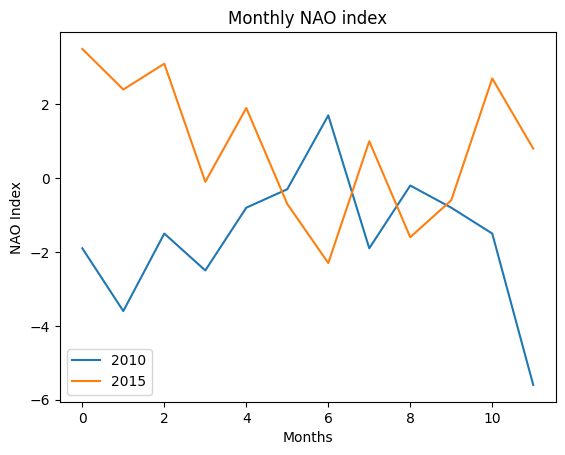

In [70]:
plt.plot(nao[145,:])
plt.plot(nao[150,:])

plt.xlabel('Months')
plt.ylabel('NAO Index')
plt.title('Monthly NAO index')
plt.legend(('2010','2015'))
plt.show()

#### OPTIONAL
-   The NAO index directly correlates to the amount of rainfall and or cold weather experienced in the UK. A large negative index would create very cold conditions. Can you identify which year produced very cold conditions in the winter months (Nov, Dec, Jan)?

### Pandas
- Open the same nao dataset above, but using the pandas package instead. Use the pandas `read_csv()` function to read the dataset into the notebook as a Pandas DataFrame.
   <br> Note: <br> - You can use skiprows to ignore the header <br> - The delimiter has two spaces <br> - You can use `.head()` to view the first 5 entries in the DataFrame

In [159]:
nao = pd.read_csv(infile, skiprows=1, delimiter='  ')
nao.tail()

/tmp/ipykernel_108/3767093282.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  nao = pd.read_csv(infile, skiprows=1, delimiter='  ')


,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
149,2014,2.0,2.2,2.2,-0.4,1.4,-1.7,0.2,-0.8,-2.1,0.1,0.6,2.9
150,2015,3.5,2.4,3.1,-0.1,1.9,-0.7,-2.3,1.0,-1.6,-0.6,2.7,0.8
151,2016,0.0,2.4,1.4,-1.7,-0.8,-0.2,0.4,0.2,2.8,-1.2,1.0,0.9
152,2017,-0.4,1.2,1.5,-1.0,-2.4,1.4,1.8,0.3,2.3,0.7,-1.2,0.8
153,2018,2.4,0.9,-1.0,1.2 -999. -999. -999. -999. -999. -999. -999....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Create the variables `time` and `Jan` using the appropriate columns in the DataFrame.  You can use `.iloc[]` to specify the column by index, e.g. `nao.iloc[:,1]`. What data type are these new variables?

In [133]:
time = nao.iloc[:,0]
Jan = nao.iloc[:,1]

type(time)

pandas.core.series.Series

- Visualise the NAO index for January

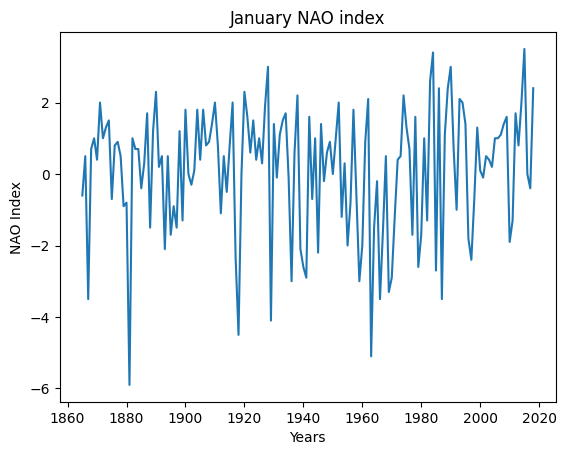

In [179]:
plt.plot(time,Jan)
plt.xlabel('Years')
plt.ylabel('NAO Index')
plt.title('January NAO index')
plt.show()

## 2. NetCDF data

-   Load the dataset `ue_data/CRUTEM.4.6.0.0.anomalies.nc`
-   What information / data is contained in the dataset? Use the print command to get some information about its content. 

In [8]:
import netCDF4 as nc
infile = '../../data/CRUTEM.4.6.0.0.anomalies.nc'
ds = nc.Dataset(infile)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CRUTEM4 temperature anomalies
    institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Centre
    history: 
    source: 
    comment: 
    reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139
    version: CRUTEM.4.6.0.0
    Conventions: CF-1.0
    dimensions(sizes): latitude(36), longitude(72), time(2029), field_status_string_length(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time, latitude, longitude), |S1 field_status(time, field_status_string_length)
    groups: 


-  Inspect the content of the attributes `dimensions` and `variables`. How long are the dimensions `longitude` and `time`? Which unit and data type does the variable `temperature_anomaly` have and on which dimensions is it defined?

In [27]:
print(ds.variables['time'].size)
print(ds.variables['time'].units)
print(ds.variables['longitude'].size)
print(ds.variables['temperature_anomaly'].units)
print(ds.variables['temperature_anomaly'].dtype)

2029
days since 1850-1-1 00:00:00
72
K
float32


-  Read the last time step of the variable `temperature_anomaly` to the memory. What shape do you expect the resulting array to have and why? Which value does this last time step have and what does this mean in terms of the dates that we are normally used to? 

[1.55000e+01 4.50000e+01 7.45000e+01 ... 6.16800e+04 6.17105e+04
 6.17415e+04]
(2029,)


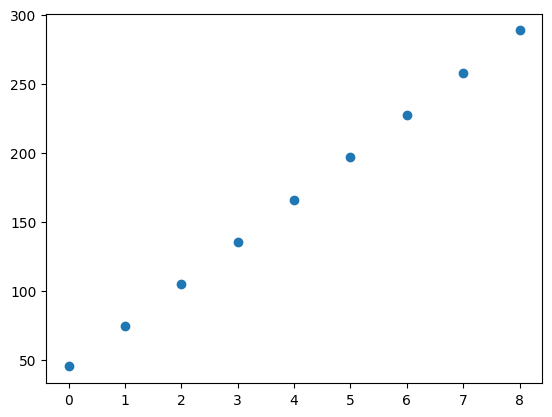

In [26]:
t_anom = ds.variables['temperature_anomaly'][-1,:,:]
print(ds.variables['time'][:])
print(np.shape(ds.variables['time'][:]))
plt.plot(ds.variables['time'][1:10],'o')

-   Plot the last time step in map view (see the Applied Programming Book for help). 

In [ ]:
plt.pcolormesh(
    ds.variables['longitude'][:],
    ds.variables['latitude'][:],
    t_anom
);

-  Compute the globally averaged temperature anomaly for each time step. (*Note: the data is given in spherical coordinates and to calculate a proper average value the single data points need to be weighted with the cosine of the latitude in radians. We skip this here)*. You may want to use a loop here.

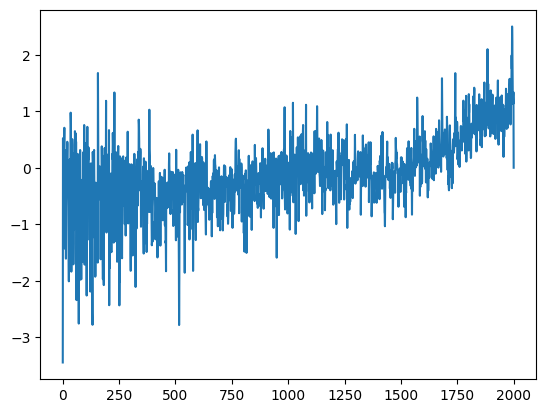

In [38]:
avg_anom = np.empty([2001])
for i in range(0,2000):
    avg_anom[i] = np.mean(ds.variables['temperature_anomaly'][i,:,:])
plt.plot(avg_anom)

 -   Plot the data to inspect the anomalies over time. 